In [1]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
%cd /content/gdrive/MyDrive/SLIIT/Data_Science/Data_Science_Projects/Coursera Projects/TensorFlow/IBM Course of TensorFlow

/content/gdrive/MyDrive/SLIIT/Data_Science/Data_Science_Projects/Coursera Projects/TensorFlow/IBM Course of TensorFlow


In [4]:
import numpy as np
import pandas as pd

#import the csv while parsing the dates (if the data type of date is not in datetime, this will change it to that)
df = pd.read_csv('2023_Fuel_Consumption_Ratings.csv', encoding='latin-1')

In [6]:
df.isnull().any()

Model year              False
Make                    False
Model                   False
Vehicle class           False
Engine size (L)         False
Cylinders               False
Transmission            False
Fuel type               False
City (L/100 km)         False
Highway (L/100 km)      False
Combined (L/100 km)     False
Combined (mpg)          False
CO2 emissions (g/km)    False
CO2 rating              False
Smog rating             False
dtype: bool

In [7]:
df.head()

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2023,Acura,Integra,Full-size,1.5,4,AV7,Z,7.9,6.3,7.2,39,167,6,7
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,6
3,2023,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
4,2023,Acura,MDX SH-AWD Type S,Sport utility vehicle: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,5


In [8]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.9.0


In [9]:
#This is to split the dataset into training & testing. we need scikit-learn for that
pip install scikit-learn

### **The dataset has no null values nor any issues. Let's try to create a regression model to identify how the engine size effects CO2 emission.**

In [10]:
from sklearn.model_selection import train_test_split

#We take them into numpy array because numpy is efficient with tensorflow
X = np.asanyarray(df['Engine size (L)'])
Y = np.asanyarray(df['CO2 emissions (g/km)'])

#Lets split the dataset into training & testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### **As we can remember Y = W.X + b is the formular for linear regression. We have to find the ideal W (weights) & b (biase) vaues to find the best model. To start the proceedings we have to initialize the W & b.**

In [12]:
#Lets initialie W & b with tensorflow variables
W = tf.Variable(20.0)
b = tf.Variable(30.2)

#Let's create the hypothesis function for the regression model. When X is passed through, you get the predicted value (Y)
def RegModel(X):
   Y = W*X + b
   return Y

### **We also have to define the loss function for this regression model which calculates the square error of the difference between actual and predicted values.**

In [14]:
def loss_object(y,train_y) :
    return tf.reduce_mean(tf.square(y - train_y))
    #tf.square() produces the square value of the difference of the given two values.
    #tf.reduce_mean provides the mean of the square values (when tensor is a miltifdimentional one this is useful)

    #Below is a predefined method offered by TensorFlow to calculate loss function
    #loss_object = tf.keras.losses.MeanSquaredLogarithmicError()

In [15]:
#folowing arrays are defined just to take values & display in graphs. Nthing else.
train_data = []
loss_values =[]
W_values = []
b_values = []

#steps of looping through all your data to update the parameters
training_epochs = 200
#learning rate
learning_rate = 0.01


# train model
for epoch in range(training_epochs):
    with tf.GradientTape() as tape: #This will keep track of operations taking place inside of it. This tracking is used to compute gradients, which are essential for the optimization process in training neural networks.
        Y_predict = RegModel(X_train)
        loss_value = loss_object(Y_train,Y_predict)
        loss_values.append(loss_value) #Let's just keep track of the loss value to plot them later

        # get gradients. Remember gradient defines the direction towards the minimization of loss value with respect to the Weights and biase.
        #It will help to ientify the optimul weight and biase values for the model.
        gradients = tape.gradient(loss_value, [W,b])

        # compute and adjust weights
        #first just record the current W & b values.
        W_values.append(W.numpy())
        b_values.append(b.numpy())

        #Adjust the weight & biase
        W.assign_sub(gradients[0]*learning_rate)
        b.assign_sub(gradients[1]*learning_rate)
        if epoch % 5 == 0:
            train_data.append([W.numpy(), b.numpy()])
            #This is also to keep track record of train data to display later. nothing else

### **Lets just plot how the loss values have changed over time.**

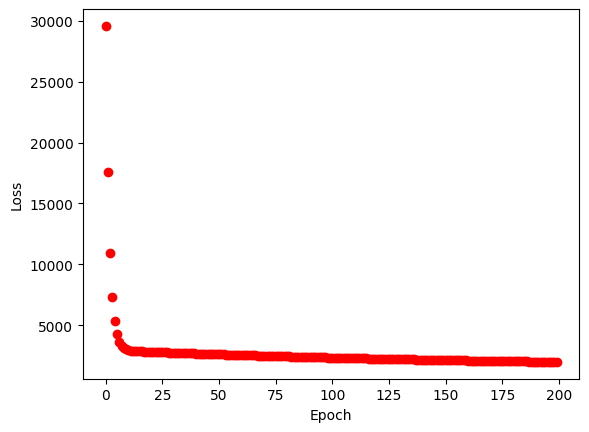

In [17]:
import matplotlib.pyplot as plt

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss_values, 'ro')

### **Let's evaluate the model now using the test data.**

In [18]:
# Predict on test data
Y_pred_test = RegModel(X_test)

# Calculate loss on test data
test_loss = loss_object(Y_test, Y_pred_test)

print(f"Test Loss: {test_loss.numpy()}")

Test Loss: 1765.29736328125


In [22]:
# Predict on test data
Y_pred_test = RegModel(X_test)

# Calculate loss on test data using two different metrices
MSLE = tf.keras.losses.MeanSquaredLogarithmicError()
MSE = tf.keras.losses.MeanSquaredError()

MSLE_Value = MSLE(Y_test, Y_pred_test)
MSE_Value = MSE(Y_test, Y_pred_test)

print(f"Test Loss: {MSLE_Value.numpy()}")
print(f"Test Loss: {MSE_Value.numpy()}")

Test Loss: 0.03030146285891533
Test Loss: 1765.29736328125
